In [1]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r'C:\Users\inupa\Desktop\practice ML\G-Safe-Edge-Ai\ml-model\labeled_driving_data_cleaned.csv'

# Read the CSV file
df = pd.read_csv(file_path)

In [3]:
df

,g_force,accel_change,road_type,gyro_z_abs,label
0,0.166057,0.486524,Normal,0.237526,Safe
1,0.260036,0.468243,Normal,0.218137,Safe
2,0.297294,0.450737,Rough,0.217206,Safe
3,0.192085,0.830517,Normal,0.390643,Safe
4,0.324003,0.936045,Rough,1.337039,Dangerous
...,...,...,...,...,...
2953,0.275098,0.919515,Rough,0.521379,Dangerous
2954,0.434064,0.652211,Rough,0.348246,Safe
2955,0.352228,0.501316,Rough,0.438643,Safe
2956,0.458944,0.580991,Rough,0.793822,Dangerous


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
road_type_encoder = LabelEncoder()
label_encoder = LabelEncoder()

# Encode 'road_type' and 'label'
df['road_type_encoded'] = road_type_encoder.fit_transform(df['road_type'])
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Preview the encoded dataset
df[['road_type', 'road_type_encoded', 'label', 'label_encoded']].head()

,road_type,road_type_encoded,label,label_encoded
0,Normal,0,Safe,1
1,Normal,0,Safe,1
2,Rough,1,Safe,1
3,Normal,0,Safe,1
4,Rough,1,Dangerous,0


In [7]:
df

,g_force,accel_change,road_type,gyro_z_abs,label,road_type_encoded,label_encoded
0,0.166057,0.486524,Normal,0.237526,Safe,0,1
1,0.260036,0.468243,Normal,0.218137,Safe,0,1
2,0.297294,0.450737,Rough,0.217206,Safe,1,1
3,0.192085,0.830517,Normal,0.390643,Safe,0,1
4,0.324003,0.936045,Rough,1.337039,Dangerous,1,0
...,...,...,...,...,...,...,...
2953,0.275098,0.919515,Rough,0.521379,Dangerous,1,0
2954,0.434064,0.652211,Rough,0.348246,Safe,1,1
2955,0.352228,0.501316,Rough,0.438643,Safe,1,1
2956,0.458944,0.580991,Rough,0.793822,Dangerous,1,0


In [9]:
columns_to_drop = ['label', 'road_type'] 

In [11]:
df = df.drop(columns=columns_to_drop)

In [13]:
df

,g_force,accel_change,gyro_z_abs,road_type_encoded,label_encoded
0,0.166057,0.486524,0.237526,0,1
1,0.260036,0.468243,0.218137,0,1
2,0.297294,0.450737,0.217206,1,1
3,0.192085,0.830517,0.390643,0,1
4,0.324003,0.936045,1.337039,1,0
...,...,...,...,...,...
2953,0.275098,0.919515,0.521379,1,0
2954,0.434064,0.652211,0.348246,1,1
2955,0.352228,0.501316,0.438643,1,1
2956,0.458944,0.580991,0.793822,1,0


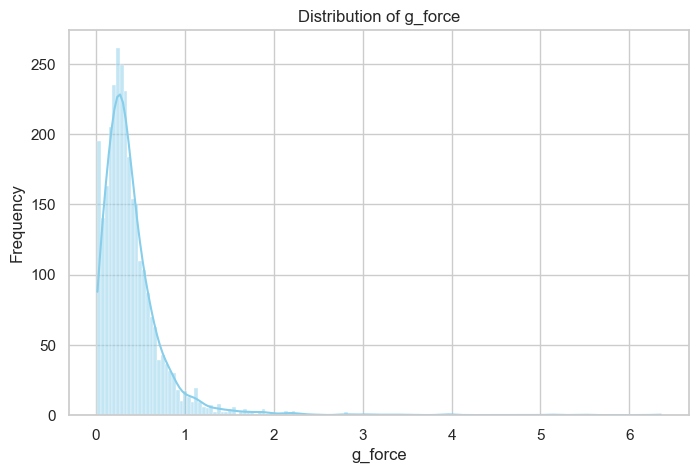

count    2958.000000
mean        0.401884
std         0.381774
min         0.019131
25%         0.195097
50%         0.318461
75%         0.497942
max         6.355678
Name: g_force, dtype: float64

Skewness: 5.03
Kurtosis: 49.71

Shapiro-Wilk Test:
Statistic=0.6677, p-value=0.0000


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Example feature
feature = 'g_force' 

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[feature], kde=True, color='skyblue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
print(df[feature].describe())

# Skewness and Kurtosis
skewness = df[feature].skew()
kurtosis = df[feature].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Shapiro-Wilk Test (normality test for small samples)
shapiro_result = stats.shapiro(df[feature].dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_result.statistic:.4f}, p-value={shapiro_result.pvalue:.4f}")


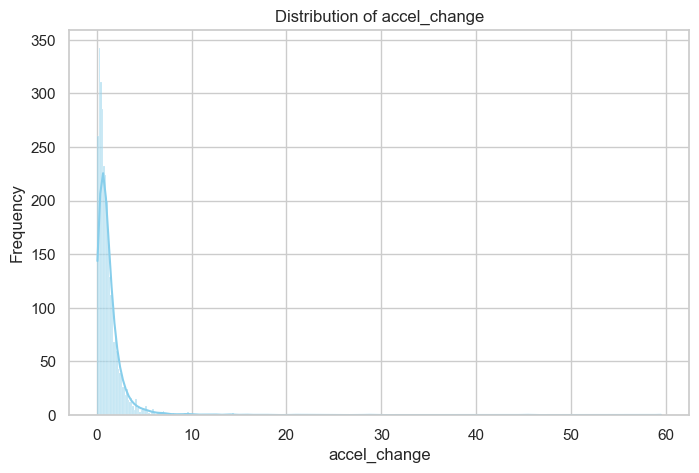

count    2958.000000
mean        1.338005
std         2.139630
min         0.084799
25%         0.449696
50%         0.881512
75%         1.547642
max        59.465035
Name: accel_change, dtype: float64

Skewness: 12.48
Kurtosis: 263.88

Shapiro-Wilk Test:
Statistic=0.3938, p-value=0.0000


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Example feature
feature = 'accel_change'

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[feature], kde=True, color='skyblue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
print(df[feature].describe())

# Skewness and Kurtosis
skewness = df[feature].skew()
kurtosis = df[feature].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Shapiro-Wilk Test (normality test for small samples)
shapiro_result = stats.shapiro(df[feature].dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_result.statistic:.4f}, p-value={shapiro_result.pvalue:.4f}")


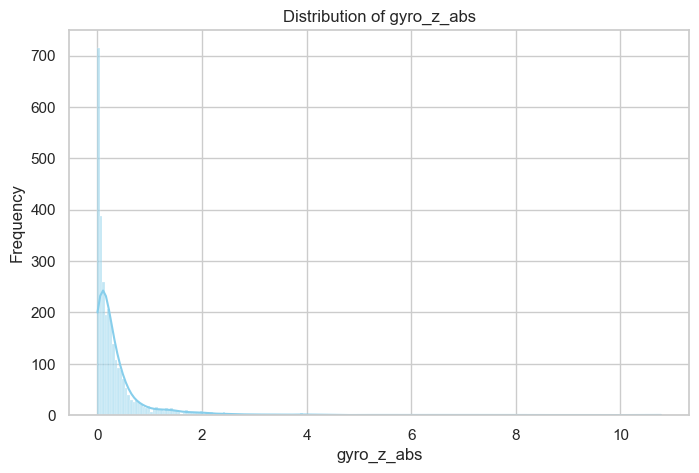

count    2958.000000
mean        0.368760
std         0.665093
min         0.000087
25%         0.050778
50%         0.171590
75%         0.395360
max        10.777971
Name: gyro_z_abs, dtype: float64

Skewness: 5.79
Kurtosis: 54.02

Shapiro-Wilk Test:
Statistic=0.5023, p-value=0.0000


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Example feature
feature = 'gyro_z_abs'

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[feature], kde=True, color='skyblue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
print(df[feature].describe())

# Skewness and Kurtosis
skewness = df[feature].skew()
kurtosis = df[feature].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Shapiro-Wilk Test (normality test for small samples)
shapiro_result = stats.shapiro(df[feature].dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_result.statistic:.4f}, p-value={shapiro_result.pvalue:.4f}")
